In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datasets import load_dataset
import ast
import matplotlib.ticker as ticker

c:\Users\anmol\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
ds = pd.read_pickle('datasets/ds_cleaned_2')

In [5]:
ds_1 = ds[ds['job_title_short'] == 'Data Analyst'].copy()

In [6]:
ds_1 = ds_1[ds_1['salary_year_avg'].notna()].copy()

In [7]:
ds_2 = ds_1.explode('job_skills_copy').copy()
ds_2 = ds_2.drop(columns='job_type_skills_copy')
ds_2 = ds_2.drop_duplicates()

In [8]:
skills_count_data = ds_2.groupby('job_skills_copy').agg(
    count = ('job_skills_copy' , 'count'),
    median = ('salary_year_avg' , 'median')
)

In [9]:
skills_count_data_2 = skills_count_data.sort_values(by = 'count' , ascending=False).head(10)

In [10]:
skills_count_data_3 = skills_count_data_2.sort_values(by = 'median' , ascending=False )

In [11]:
skills_count_data_3.to_pickle('data_graphs/DA_best_skills/skills_count')

In [12]:
ds_3 = ds_1.copy()

In [13]:
ds_3 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills_copy,job_type_skills_copy
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783932,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784322,Data Analyst,Sales Data Analyst,"Juriquilla, Qro., Mexico",via Ai-Jobs.net,Full-time,False,Mexico,2023-01-05 06:43:20,False,False,Mexico,year,80850.0,NaN,Charger Logistics Inc,"[tableau, power bi]","{'analyst_tools': ['tableau', 'power bi']}"
784781,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,"[sql, vba, tableau, excel, alteryx]","{'analyst_tools': ['tableau', 'excel', 'altery..."
785086,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,"[sql, python, r, looker]","{'analyst_tools': ['looker'], 'programming': [..."


In [14]:
ds_3 = ds_3.drop(columns='job_type_skills_copy')
ds_3 = ds_3.explode('job_skills_copy').copy()
ds_3 = ds_2.drop_duplicates()

In [15]:
skills_salary = ds_3.groupby('job_skills_copy').agg(
    avg_sal = ('salary_year_avg' , 'median')
)

In [16]:
skills_salary_2 = skills_salary.sort_values(by = 'avg_sal' , ascending=False).head(10)

most_paid_skills

In [17]:
skills_salary_2.to_pickle('data_graphs/DA_best_skills/most_avg_salary')

In [18]:
skills_salary_2.sort_values(by='avg_sal' , ascending=False, inplace=True)

In [19]:
skills_count_data_3.sort_values(by='median' , ascending=False , inplace=True)

In [20]:
skills_salary_2

,avg_sal
job_skills_copy,
svn,400000.0
solidity,179000.0
dplyr,167500.0
gitlab,163782.0
terraform,163782.0
couchbase,160515.0
datarobot,155485.5
golang,155000.0
mxnet,149000.0


In [21]:
skills_salary_2.reset_index(inplace=True)

In [22]:
skills_count_data_3.reset_index(inplace=True)

In [23]:
skills_count_data_3

,job_skills_copy,count,median
0,python,1837,98500.0
1,tableau,1655,95000.0
2,r,1072,92527.5
3,sql,3077,92500.0
4,sql server,336,92150.0
5,power bi,1042,90000.0
6,sas,502,90000.0
7,powerpoint,518,85000.0
8,excel,2133,84479.0
9,word,523,80000.0


Text(0.5, 0, '')

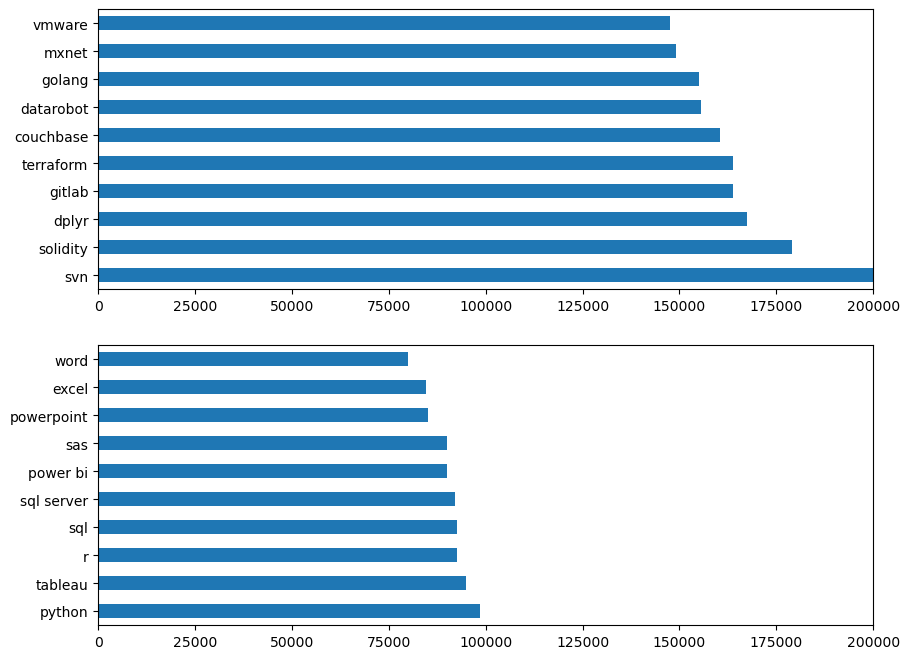

In [24]:
fig , ax= plt.subplots(2 ,1 , figsize=(10 ,8) )
skills_salary_2.plot(x='job_skills_copy' , y='avg_sal' , kind='barh' , ax=ax[0] ,legend=False)
ax[0].set_xlim(0,200000)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

skills_count_data_3.plot(x='job_skills_copy' , y='median' , kind='barh' , ax=ax[1] , legend=False)
ax[1].set_xlim(0 ,200000)
ax[1].set_ylabel('')
ax[1].set_xlabel('')




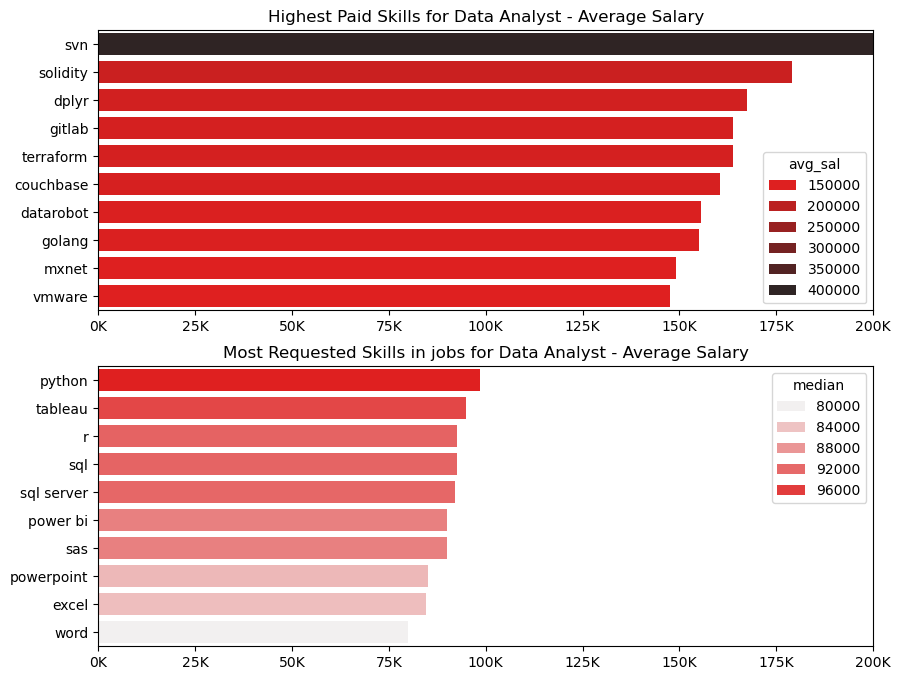

In [28]:
fig ,ax=plt.subplots(2,1,figsize=(10,8))
sns.barplot(skills_salary_2 , y='job_skills_copy' , x='avg_sal' , ax=ax[0] ,hue='avg_sal' , palette='dark:r_r')
ax[0].set_xlim(0,200000)
ax[0].set_title('Highest Paid Skills for Data Analyst - Average Salary')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{int(x/1000)}K'))

sns.barplot(skills_count_data_3 , y='job_skills_copy' , x='median' , ax=ax[1] , hue='median' , palette='light:r')
ax[1].set_xlim(0,200000)
ax[1].set_title('Most Requested Skills in jobs for Data Analyst - Average Salary')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x , pos:f'{int(x/1000)}K'))